# Data Manipulation with pandas

## Slicing and Indexing

### Explicit indexes

Dataframes behave in 3 parts:
* A numpy array for the data
* Two indexes (row and column)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dogs = pd.read_csv("../data/dogs.csv")
dogs

,name,breed,color,height_cm,weight_kg0
0,Bella,Labrador,Brown,56,251
1,Charlie,Poodle,Black,43,232
2,Lucy,Chow,Brown,46,223
3,Cooper,Schnauzer,Gray,49,174
4,Max,Labrador,Black,59,295
5,Stella,Chihuahua,Tan,18,26
6,Bernie,St. Bernard,White,77,74


In [4]:
dogs_ind = dogs.set_index("name")
dogs_ind

,breed,color,height_cm,weight_kg0
name,,,,
Bella,Labrador,Brown,56,251
Charlie,Poodle,Black,43,232
Lucy,Chow,Brown,46,223
Cooper,Schnauzer,Gray,49,174
Max,Labrador,Black,59,295
Stella,Chihuahua,Tan,18,26
Bernie,St. Bernard,White,77,74


In [5]:
dogs_ind.reset_index() # Just reset the content

,name,breed,color,height_cm,weight_kg0
0,Bella,Labrador,Brown,56,251
1,Charlie,Poodle,Black,43,232
2,Lucy,Chow,Brown,46,223
3,Cooper,Schnauzer,Gray,49,174
4,Max,Labrador,Black,59,295
5,Stella,Chihuahua,Tan,18,26
6,Bernie,St. Bernard,White,77,74


In [6]:
dogs_ind.reset_index(drop=True) # remove the content

,breed,color,height_cm,weight_kg0
0,Labrador,Brown,56,251
1,Poodle,Black,43,232
2,Chow,Brown,46,223
3,Schnauzer,Gray,49,174
4,Labrador,Black,59,295
5,Chihuahua,Tan,18,26
6,St. Bernard,White,77,74


In [7]:
dogs[dogs['name'].isin(['Bella','Stella'])]

,name,breed,color,height_cm,weight_kg0
0,Bella,Labrador,Brown,56,251
5,Stella,Chihuahua,Tan,18,26


In [8]:
dogs_ind.loc[['Bella','Stella']]

,breed,color,height_cm,weight_kg0
name,,,,
Bella,Labrador,Brown,56,251
Stella,Chihuahua,Tan,18,26


In [9]:
# Multiline or hierarchical index
dogs_ind2 = dogs.set_index(["breed", "color"])
dogs_ind2

,,name,height_cm,weight_kg0
breed,color,,,
Labrador,Brown,Bella,56,251
Poodle,Black,Charlie,43,232
Chow,Brown,Lucy,46,223
Schnauzer,Gray,Cooper,49,174
Labrador,Black,Max,59,295
Chihuahua,Tan,Stella,18,26
St. Bernard,White,Bernie,77,74


In [10]:
dogs_ind2.loc[['Labrador','Chihuahua']]

name  height_cm  weight_kg0
breed     color                               
Labrador  Brown   Bella         56         251
          Black     Max         59         295
Chihuahua Tan    Stella         18          26

In [11]:
dogs_ind2.loc[[('Labrador','Brown'),('Chihuahua','Tan')]]

,,name,height_cm,weight_kg0
breed,color,,,
Labrador,Brown,Bella,56,251
Chihuahua,Tan,Stella,18,26


In [12]:
# SORT BY SORT INDEX
dogs_ind2.sort_index()

name  height_cm  weight_kg0
breed       color                                
Chihuahua   Tan     Stella         18          26
Chow        Brown     Lucy         46         223
Labrador    Black      Max         59         295
            Brown    Bella         56         251
Poodle      Black  Charlie         43         232
Schnauzer   Gray    Cooper         49         174
St. Bernard White   Bernie         77          74

In [13]:
dogs_srt = dogs_ind2.sort_index(level=["color", "breed"], ascending=[True, False])
dogs_srt

name  height_cm  weight_kg0
breed       color                                
Poodle      Black  Charlie         43         232
Labrador    Black      Max         59         295
            Brown    Bella         56         251
Chow        Brown     Lucy         46         223
Schnauzer   Gray    Cooper         49         174
Chihuahua   Tan     Stella         18          26
St. Bernard White   Bernie         77          74

### Slicing and subsetting with .loc and .iloc

In [14]:
dogs_ind2 = dogs.set_index(["breed", "color"]).sort_index()
dogs_ind2

name  height_cm  weight_kg0
breed       color                                
Chihuahua   Tan     Stella         18          26
Chow        Brown     Lucy         46         223
Labrador    Black      Max         59         295
            Brown    Bella         56         251
Poodle      Black  Charlie         43         232
Schnauzer   Gray    Cooper         49         174
St. Bernard White   Bernie         77          74

In [15]:
dogs_ind2.loc['Chow':'Poodle']

name  height_cm  weight_kg0
breed    color                                
Chow     Brown     Lucy         46         223
Labrador Black      Max         59         295
         Brown    Bella         56         251
Poodle   Black  Charlie         43         232

In [16]:
dogs_ind2.loc[:,'name':'height_cm']

name  height_cm
breed       color                    
Chihuahua   Tan     Stella         18
Chow        Brown     Lucy         46
Labrador    Black      Max         59
            Brown    Bella         56
Poodle      Black  Charlie         43
Schnauzer   Gray    Cooper         49
St. Bernard White   Bernie         77

In [17]:
dogs_ind2.loc[('Chihuahua','Tan'):('Labrador','Black'),"name":"height_cm"]

,,name,height_cm
breed,color,,
Chihuahua,Tan,Stella,18
Chow,Brown,Lucy,46
Labrador,Black,Max,59


In [18]:
dogs_ind2.loc[ ("Chihuahua","Tan"):("Labrador","Black")]

,,name,height_cm,weight_kg0
breed,color,,,
Chihuahua,Tan,Stella,18,26
Chow,Brown,Lucy,46,223
Labrador,Black,Max,59,295


In [19]:
temperatures = pd.read_csv("../data/temperatures.csv")
temperatures

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...,...
16495,16495,2013-05-01,Xian,China,18.979
16496,16496,2013-06-01,Xian,China,23.522
16497,16497,2013-07-01,Xian,China,25.251
16498,16498,2013-08-01,Xian,China,24.528


In [20]:
temperatures_ind = temperatures.set_index(["country", "city"])
temperatures_srt = temperatures_ind.sort_index()
temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')]

Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]

In [21]:
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
temperatures_bool

,Unnamed: 0,date,city,country,avg_temp_c
120,120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,122,2010-03-01,Abidjan,Côte D'Ivoire,29.596
123,123,2010-04-01,Abidjan,Côte D'Ivoire,29.068
124,124,2010-05-01,Abidjan,Côte D'Ivoire,28.258
...,...,...,...,...,...
16474,16474,2011-08-01,Xian,China,23.069
16475,16475,2011-09-01,Xian,China,16.775
16476,16476,2011-10-01,Xian,China,12.587
16477,16477,2011-11-01,Xian,China,7.543


In [22]:
temperatures.iloc[22,:1]

Unnamed: 0    22
Name: 22, dtype: object

### Working with pivot tables

In [23]:
dogs

,name,breed,color,height_cm,weight_kg0
0,Bella,Labrador,Brown,56,251
1,Charlie,Poodle,Black,43,232
2,Lucy,Chow,Brown,46,223
3,Cooper,Schnauzer,Gray,49,174
4,Max,Labrador,Black,59,295
5,Stella,Chihuahua,Tan,18,26
6,Bernie,St. Bernard,White,77,74


In [24]:
dogs_height_by_breed_vs_color = dogs.pivot_table(
    "height_cm", index="breed", columns="color"
)
dogs_height_by_breed_vs_color

# 1st argument is the column name (show)
# index - lists the columns to group and display in ROWS
# columns - list the columns to group and display in COLUMNS

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chihuahua,NaN,NaN,NaN,18.0,NaN
Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN
Schnauzer,NaN,NaN,49.0,NaN,NaN
St. Bernard,NaN,NaN,NaN,NaN,77.0


In [25]:
dogs_height_by_breed_vs_color.loc["Chow":"Poodle"]

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN


In [26]:
dogs_height_by_breed_vs_color.mean(axis='index')

color
Black    51.0
Brown    51.0
Gray     49.0
Tan      18.0
White    77.0
dtype: float64

In [27]:
dogs_height_by_breed_vs_color.mean(axis='columns')

breed
Chihuahua      18.0
Chow           46.0
Labrador       57.5
Poodle         43.0
Schnauzer      49.0
St. Bernard    77.0
dtype: float64

In [28]:
# errors='raise' - raise an exception
# errors='coerce' - set to NaT
# errors='coerce' - returns input

temperatures['date'] = pd.to_datetime(temperatures['date'], errors='coerce')

In [29]:
# temperatures
# temperatures["date"].dt.year
# temperatures["date"].dt.month
# temperatures["date"].dt.day
temperatures["date"].dt.year

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
16495    2013
16496    2013
16497    2013
16498    2013
16499    2013
Name: date, Length: 16500, dtype: int32

In [30]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year
temperatures["year"]

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
16495    2013
16496    2013
16497    2013
16498    2013
16499    2013
Name: year, Length: 16500, dtype: int32

In [31]:
# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(
    "avg_temp_c", index=["country", "city"], columns="year"
)
temp_by_country_city_vs_year

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

In [32]:
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'), 2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

## Creating and Visualizing DataFrames

### Visualizing your data

In [33]:
# IMPORT PKL DATA
import pickle
pkl_file = open('../data/avoplotto.pkl', 'rb')
avocados = pickle.load(pkl_file)
avocados

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


In [34]:
nb_sold_by_size = avocados.groupby('size').count()
nb_sold_by_size

,date,type,year,avg_price,nb_sold
size,,,,,
extra_large,338,338,338,338,338
large,338,338,338,338,338
small,338,338,338,338,338


In [35]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

In [36]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].mean()
nb_sold_by_size

size
extra_large    4.620568e+05
large          5.961573e+06
small          6.079693e+06
Name: nb_sold, dtype: float64

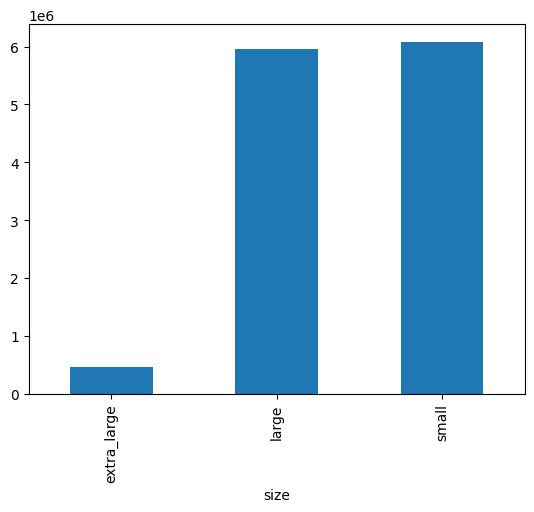

In [37]:
# Which avocado size is most popular?
nb_sold_by_size.plot(kind='bar')
plt.show()

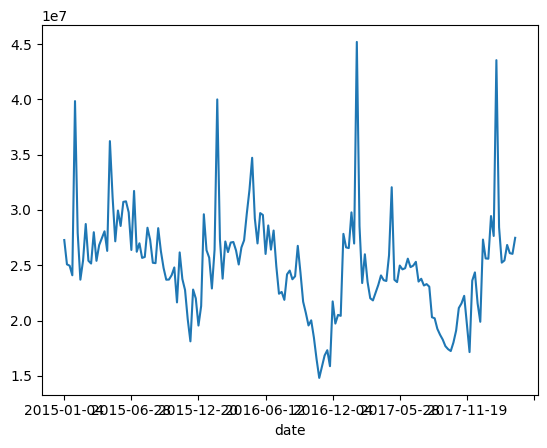

In [38]:
# Changes in sales over time
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date.plot(kind='line')
plt.show()

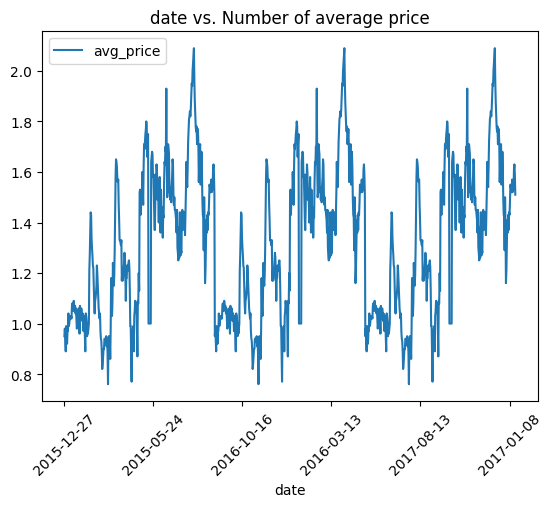

In [39]:
avocados.plot(x='date', y='avg_price', kind="line", title="date vs. Number of average price", rot=45)
plt.show()

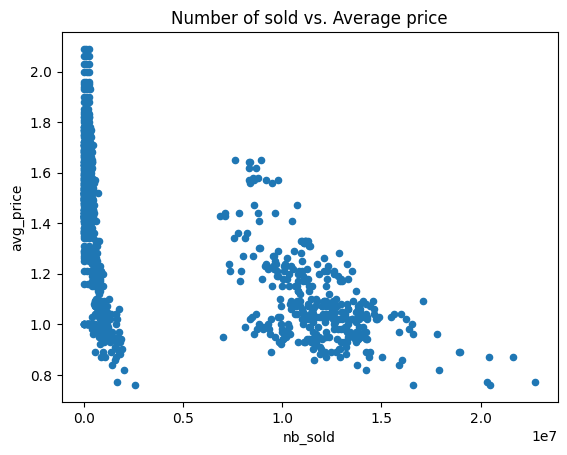

In [40]:
# Avocado supply and demand
avocados.plot(x='nb_sold', y='avg_price', kind="scatter", title="Number of sold vs. Average price")
plt.show()

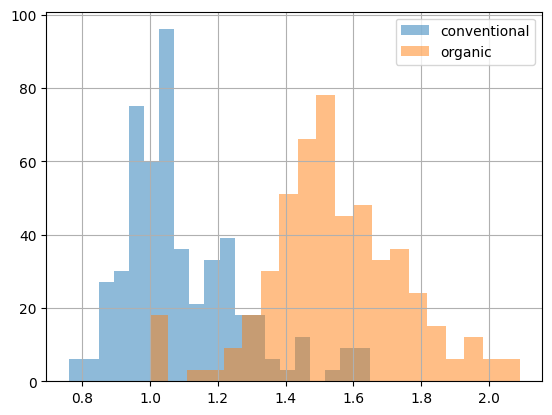

In [42]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist(bins=20, alpha=0.5)
avocados[avocados['type'] == 'organic']['avg_price'].hist(bins=20, alpha=0.5)
plt.legend(['conventional', 'organic'])
plt.show()

### Missing Values

In [44]:
# Matrix to know if there is NA or not in all the values of the data frame
dogs.isna()

# Matrix to know whether or not there is NA in each column that we have
dogs.isna().any()

# How many NA values we have
dogs.isna().sum()

name          0
breed         0
color         0
height_cm     0
weight_kg0    0
dtype: int64

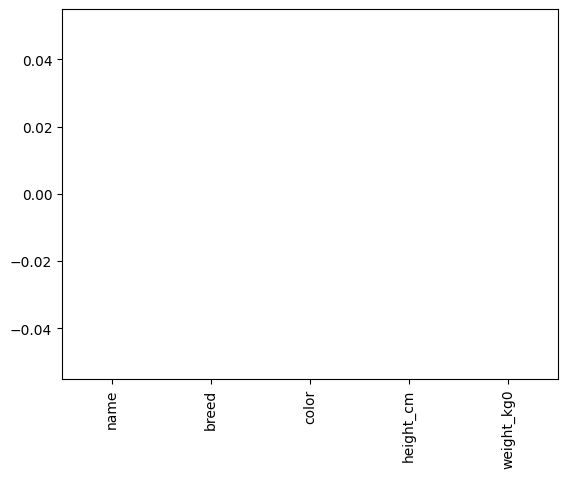

In [45]:
# See histogram of the amount of NA by columns
dogs.isna().sum().plot(kind="bar")
plt.show()

In [46]:
# There are NA values that can be done:
# - Delete the NAs
dogs.dropna()
# - Replace the NAs with another value
dogs.fillna(0)

,name,breed,color,height_cm,weight_kg0
0,Bella,Labrador,Brown,56,251
1,Charlie,Poodle,Black,43,232
2,Lucy,Chow,Brown,46,223
3,Cooper,Schnauzer,Gray,49,174
4,Max,Labrador,Black,59,295
5,Stella,Chihuahua,Tan,18,26
6,Bernie,St. Bernard,White,77,74


### Creating DataFrames

In [47]:
# There are 2 ways to create a dictionary:
# (1)- From a list of dictionaries =>
# build row by row
# (2)- From a list dictionaries =>
# build column by column

In [48]:
# (1) - From a list of dictionaries
list_of_dicts = [
    {'name': 'Ginger', "breed": "Dachshund", "height_cm": 22, 'weight_kg': 10, 'date_of_birth': '2010-01-01'},
    {'name': 'Scout', "breed": "Dalmatian", "height_cm": 59, 'weight_kg': 25, 'date_of_birth': '2019-05-09'},
]
new_dogs = pd.DataFrame(list_of_dicts)
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2010-01-01
1,Scout,Dalmatian,59,25,2019-05-09


In [49]:
#(2)- From a list dictionaries
dict_of_lists ={
    'name': ['Ginger', 'Scout'],
    'breed': ['Dachshund', 'Dalmatian'],
    'height_cm': [22, 59],
    'weight_kg': [10, 25],
    'date_of_birth': ['2010-01-01', '2019-05-09']
}
new_dogs2 = pd.DataFrame(dict_of_lists)
new_dogs2

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2010-01-01
1,Scout,Dalmatian,59,25,2019-05-09
